In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
%matplotlib inline

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [8]:
# Read the foreground image with alpha channel
foreGroundImage = cv2.imread("foreGroundAssetLarge.png", -1)

# Split png foreground image
b,g,r,a = cv2.split(foreGroundImage)

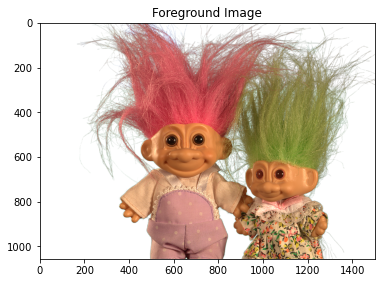

In [9]:
# Reverse B,G,R channels
plt.imshow(foreGroundImage[:,:,[2,1,0,3]])
plt.title("Foreground Image")
plt.show()

In [10]:
# Save the foregroung RGB content into a single object
foreground = cv2.merge((b,g,r))

# Save the alpha information into a single Mat
alpha = cv2.merge((a,a,a))

# Read background image
background = cv2.imread("backGroundLarge.jpg")

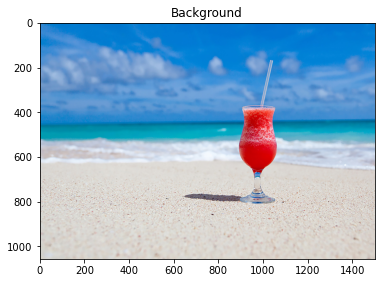

In [11]:
plt.imshow(background[:,:,::-1])
plt.title("Background")
plt.show()

In [12]:
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255

# Perform alpha blending
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

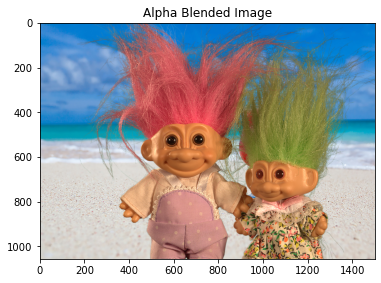

In [13]:
plt.imshow(outImage[:,:,::-1]/255)
plt.title("Alpha Blended Image")
plt.show()